In [118]:
# Análise de alunos trancados nos cursos de graduação da UFAL - Universidade Federal de Alagoas
# O intuito é entender quais os grupos de estudantes que mais realizaram trancamento de cursos entre 2010 e 2024

# Dataset público utilizado foi encontrado no dados.gov.br
#   https://dados.gov.br/dados/conjuntos-dados/alunos-trancados-nos-cursos-de-graduao-da-ufal
# metadados do dataset:
#   Catalogação: 28/07/2025
#   Data de atualização do arquivo: 28/07/2025

# Requerimentos técnicos:
#   python 3.x
#   pandas
#   matplotlib
#   requests

In [133]:
import pandas
import matplotlib.pyplot as plt

# criando dataframe principal com dados dos alunos que trancaram cursos
# uso direto do arquivo público, sem necessidade de possuir o dataset em arquivo local
trancamentos_df = pandas.read_csv('https://objects.ufal.br/dados-abertos/alunos-trancados_2025_07_28.csv')
trancamentos_df.head()


,unica,genero,etnia,idade,necessidade_especial,curso,unidade,sigla_unidade,campus,nivel,modalidade,status,forma_evasao,tipo_evasao,periodo_letivo
0,56eb827fb84f7b2c693124121b3a7596,M,Pardo,42.0,NaN,QUÍMICA - CAMPUS MACEIÓ - DIURNO - PRESENCIAL ...,INSTITUTO DE QUÍMICA E BIOTECNOLOGIA,IQB,Campus Maceió,BACHARELADO,Presencial,trancado,NaN,NaN,2010.1
1,56eb827fb84f7b2c693124121b3a7596,M,Pardo,42.0,NaN,QUÍMICA - CAMPUS MACEIÓ - DIURNO - PRESENCIAL ...,INSTITUTO DE QUÍMICA E BIOTECNOLOGIA,IQB,Campus Maceió,BACHARELADO,Presencial,trancado,NaN,NaN,2010.2
2,56eb827fb84f7b2c693124121b3a7596,M,Pardo,42.0,NaN,QUÍMICA - CAMPUS MACEIÓ - DIURNO - PRESENCIAL ...,INSTITUTO DE QUÍMICA E BIOTECNOLOGIA,IQB,Campus Maceió,BACHARELADO,Presencial,trancado,NaN,NaN,2011.1
3,56eb827fb84f7b2c693124121b3a7596,M,Pardo,42.0,NaN,QUÍMICA - CAMPUS MACEIÓ - DIURNO - PRESENCIAL ...,INSTITUTO DE QUÍMICA E BIOTECNOLOGIA,IQB,Campus Maceió,BACHARELADO,Presencial,trancado,NaN,NaN,2011.2
4,d4623b36ab48ab9589c9efeb7e713b0a,M,Pardo,40.0,NaN,ADMINISTRAÇÃO - CAMPUS MACEIÓ - NOTURNO - PRES...,"FACULDADE DE ECONOMIA, ADMINISTRAÇÃO E CONTABI...",FEAC,Campus Maceió,BACHARELADO,Presencial,trancado,NaN,NaN,2010.1


In [134]:
# limpeza e preparação inicial de dados do dataframe

# remoção de colunas inúteis onde os valores são repetidos em todos os registros (status, forma_evasao, tipo_evasao)
trancamentos_sanitized_df = trancamentos_df.loc[:, trancamentos_df.apply(lambda col: col.nunique(dropna=False) > 1)]
# remoção de coluna 'etnia'
trancamentos_sanitized_df = trancamentos_sanitized_df.drop(columns=['etnia'])
# forçando conversão númerica de idade por conta de possuir algum registro com valor vazio
trancamentos_sanitized_df['idade'] = pandas.to_numeric(trancamentos_sanitized_df['idade'], errors='coerce')
# sanitizando o nome dos cursos (ex: 'QUÍMICA - CAMPUS MACEIÓ - DIURNO - PRESENCIAL - BACHARELADO - ANUAL - (13218)' vira 'QUÍMICA')
# e também juntando cursos como 'LETRAS (FRANCÊS)' e 'LETRAS (INGLÊS)' em um único curso 'LETRAS'
trancamentos_sanitized_df['curso'] = trancamentos_sanitized_df['curso'].str.split('-').str[0].str.split('(').str[0].str.strip()

trancamentos_sanitized_df.head()

,unica,genero,idade,necessidade_especial,curso,unidade,sigla_unidade,campus,nivel,modalidade,periodo_letivo
0,56eb827fb84f7b2c693124121b3a7596,M,42.0,NaN,QUÍMICA,INSTITUTO DE QUÍMICA E BIOTECNOLOGIA,IQB,Campus Maceió,BACHARELADO,Presencial,2010.1
1,56eb827fb84f7b2c693124121b3a7596,M,42.0,NaN,QUÍMICA,INSTITUTO DE QUÍMICA E BIOTECNOLOGIA,IQB,Campus Maceió,BACHARELADO,Presencial,2010.2
2,56eb827fb84f7b2c693124121b3a7596,M,42.0,NaN,QUÍMICA,INSTITUTO DE QUÍMICA E BIOTECNOLOGIA,IQB,Campus Maceió,BACHARELADO,Presencial,2011.1
3,56eb827fb84f7b2c693124121b3a7596,M,42.0,NaN,QUÍMICA,INSTITUTO DE QUÍMICA E BIOTECNOLOGIA,IQB,Campus Maceió,BACHARELADO,Presencial,2011.2
4,d4623b36ab48ab9589c9efeb7e713b0a,M,40.0,NaN,ADMINISTRAÇÃO,"FACULDADE DE ECONOMIA, ADMINISTRAÇÃO E CONTABI...",FEAC,Campus Maceió,BACHARELADO,Presencial,2010.1


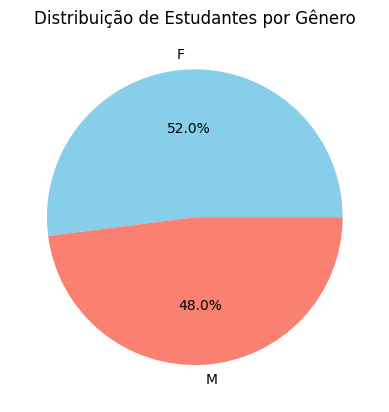

In [135]:
# gráfico pizza (pie) mostrando a distribuição por gênero de trancamentos
genero_counts = trancamentos_sanitized_df['genero'].value_counts()

plt.pie(
    genero_counts.values,
    labels=genero_counts.index,
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon', 'lightgreen']  # add more if you have more categories
)
plt.title('Distribuição de Estudantes por Gênero')
plt.show()

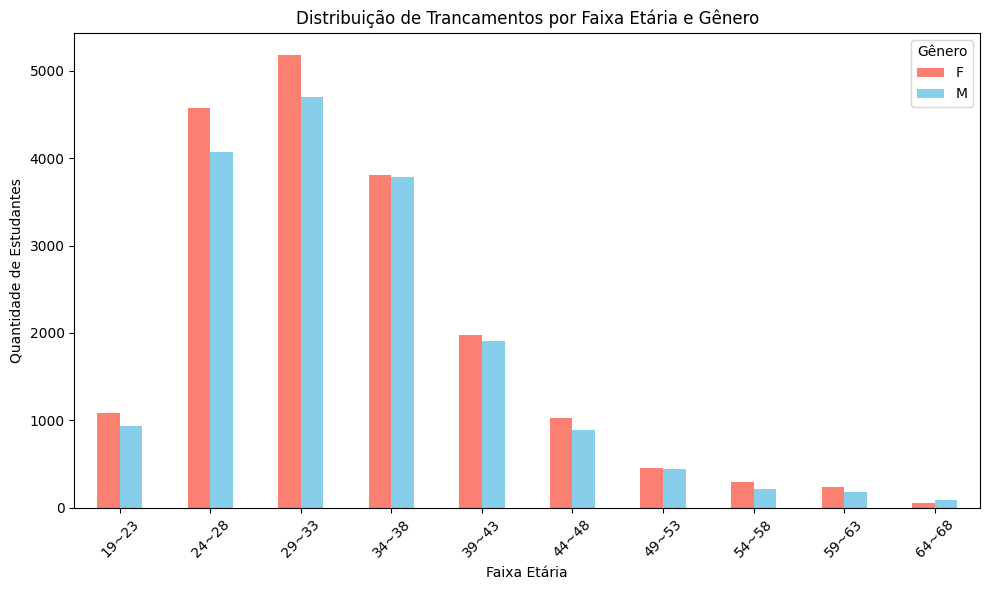

In [137]:
# gráfico demonstrando a distribuição de Trancamentos por Faixa Etária/Gênero

# criando buckets/bins de idade para apresentá-los agrupados em intervalos de 5 anos
min_idade = int(trancamentos_sanitized_df['idade'].min()) or 0
max_idade = int(trancamentos_sanitized_df['idade'].max())
idade_bins = range(min_idade, max_idade + 1, 5)
labels = [f"{i+1}~{i+5}" for i in range(min_idade, max_idade, 5)]
trancamentos_sanitized_df['idade_bucket'] = pandas.cut(trancamentos_sanitized_df['idade'], bins=idade_bins, labels=labels, right=True, include_lowest=True)
idade_genero_counts = trancamentos_sanitized_df.groupby(['idade_bucket', 'genero'], observed=True).size().unstack(fill_value=0)

# definição de threshold para considerar apenas grupos com um número relevante de alunos.
threshold = 100
idade_genero_counts = idade_genero_counts[idade_genero_counts.sum(axis=1) >= threshold]

ax = idade_genero_counts.plot(
    kind='bar',
    stacked=False,
    figsize=(10,6),
    color=['salmon', 'skyblue']
)

plt.title('Distribuição de Trancamentos por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Estudantes')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

# Nota-se que, majoritariamente, estudantes do genêro feminino trancam o curso com mais frequência em quase todas as distribuições de idade, com a única excessão sendo o grupo 64~68 nos, onde os trancamentos de cursos são liderados por estudantes do gênero masculino.
# A maior discrepância mostra-se nos grupos de 24~28 e 29~33, confirmando que o pessoas do gênero feminino com idade entre 24 e 33 são os maiores ofensores da análise genêro/idade.

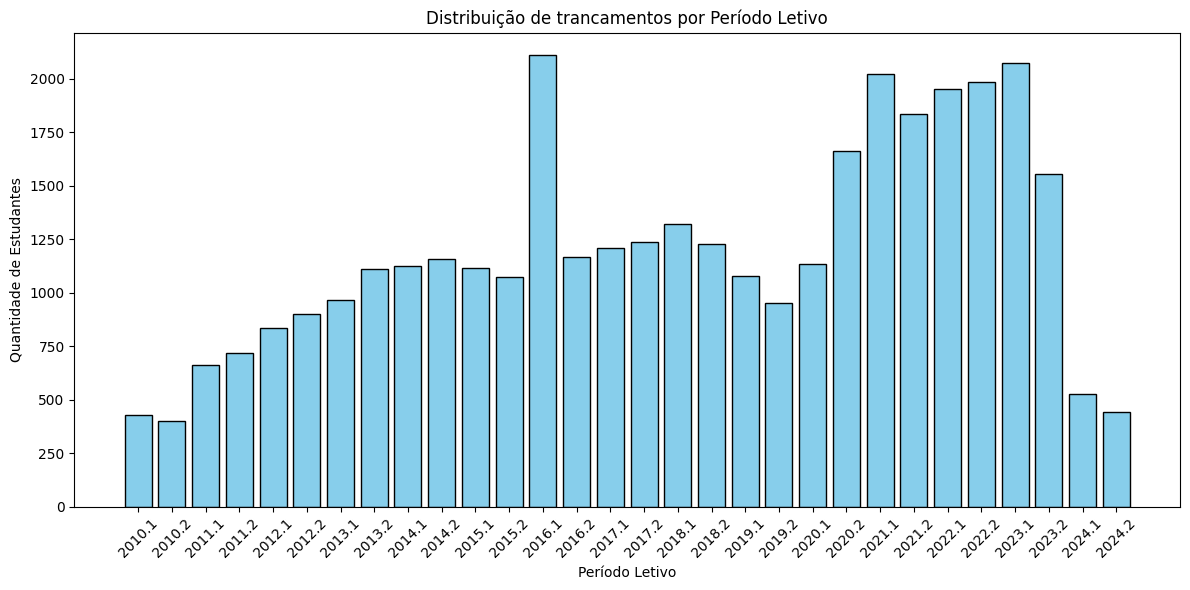

In [138]:
# gráfico demonstrando a distribuição de Trancamentos por Período Letivo (neste caso trata-se de semestre)
periodo_counts = trancamentos_sanitized_df['periodo_letivo'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.bar(periodo_counts.index.astype(str), periodo_counts.values, color='skyblue', edgecolor='black')

plt.title('Distribuição de trancamentos por Período Letivo')
plt.xlabel('Período Letivo')
plt.ylabel('Quantidade de Estudantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tratando-se de período letivo (semestre), nota-se um pico anormal no primeiro semestre letivo de 2016;
# Nota-se também um pico entre o segundo semestre de 2020 e o último semestre de 2023; temos uma evidência clara do impacto da pandemia, pois em 2024 os números dispencaram;
# Essa análise não leva em conta a quantidade de novas matrículas, que também pode impactar muito a relevância dos valores finais.

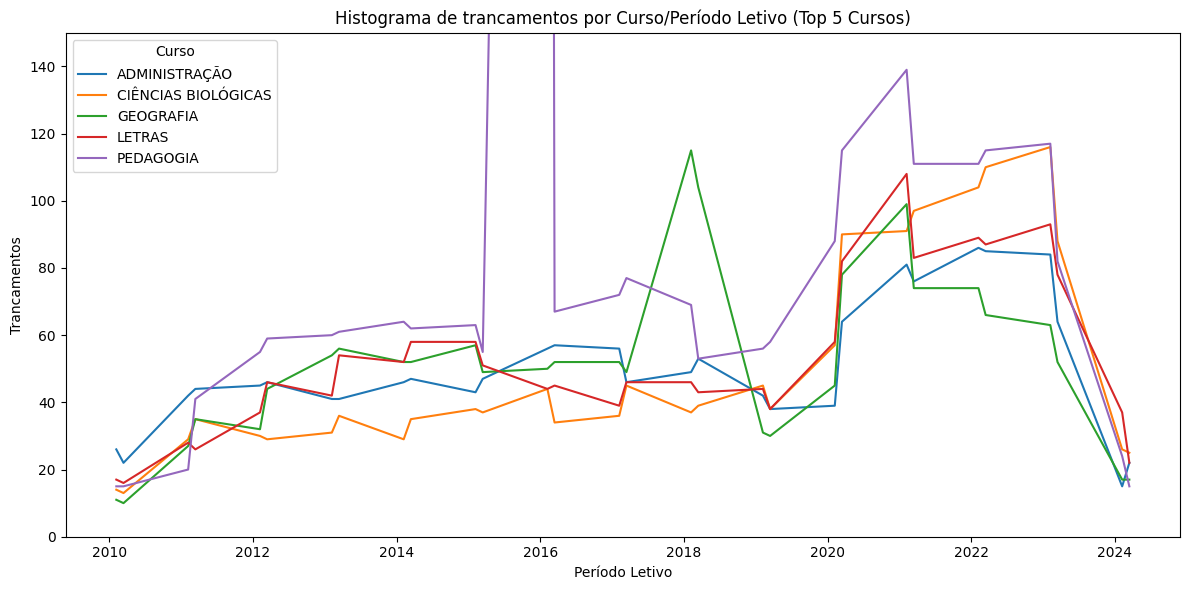

In [139]:
top_n = 5
top_cursos = (
    trancamentos_sanitized_df['curso']
    .value_counts()
    .head(top_n)
    .index
)

periodo_curso_counts = (
    trancamentos_sanitized_df[trancamentos_sanitized_df['curso'].isin(top_cursos)]
    .groupby(['periodo_letivo', 'curso'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

plt.figure(figsize=(12,6))
for course in periodo_curso_counts.columns:
    plt.plot(periodo_curso_counts.index, periodo_curso_counts[course], label=course)

plt.title(f'Histograma de trancamentos por Curso/Período Letivo (Top {top_n} Cursos)')
plt.xlabel('Período Letivo')
plt.ylabel('Trancamentos')
plt.legend(title='Curso')
plt.ylim(0, 150) # limitando y' para 150, pois 'PEDAGOGIA' é um outlier em '2016.1' tendo mais de 2 mil trancamentos
plt.tight_layout()
plt.show()

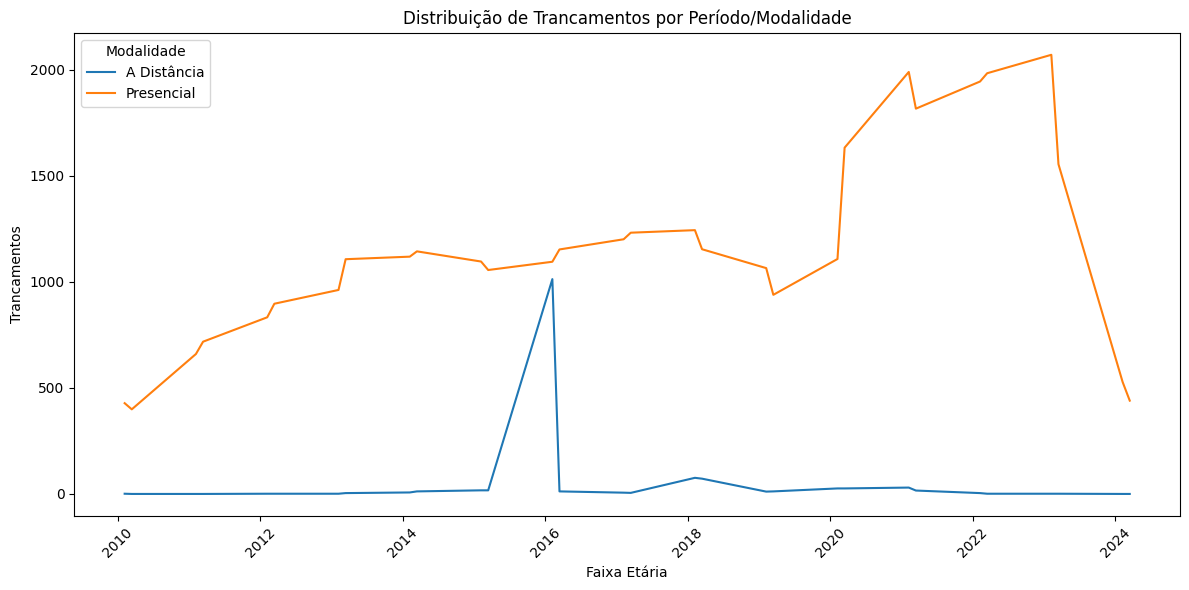

In [140]:
periodoletivo_modalidade_counts = trancamentos_sanitized_df.groupby(['periodo_letivo', 'modalidade'], observed=True).size().unstack(fill_value=0)

ax = periodoletivo_modalidade_counts.plot(
    stacked=False,
    figsize=(12,6),
)

plt.title('Distribuição de Trancamentos por Período/Modalidade')
plt.xlabel('Faixa Etária')
plt.ylabel('Trancamentos')
plt.xticks(rotation=45)
plt.legend(title='Modalidade')
plt.tight_layout()
plt.show()

# Ao analisar os trancamentos por período e modalidade, fica evidente o impacto de trancamento de cursos da modalidade Presencial no período pandêmico
# Confirma-se também um pico em trancamentos na modalidade a distância no período '2016.1', confirmando o grupo outlier do gráfico 'Histograma de trancamentos por Curso/Período Letivo'

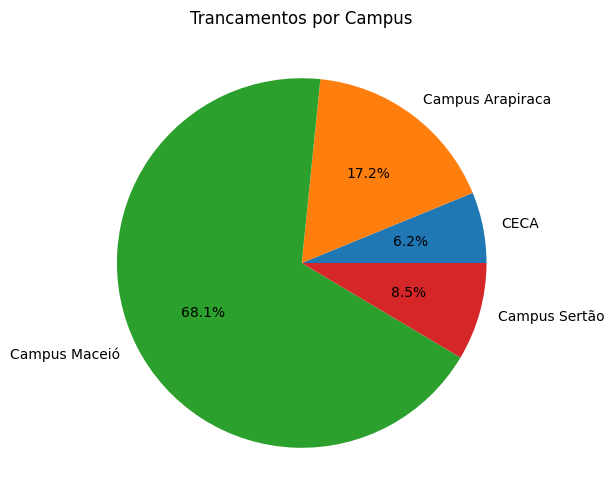

In [141]:
# gráfico pizza (pie) mostrando a quantidade em % da representatividade de trancamentos de cada Campus
campus_counts = (
    trancamentos_sanitized_df
    .groupby(['campus'])
    .size()
    .sort_index()
)

plt.figure(figsize=(6,6))
plt.pie(
    campus_counts.values,
    labels=campus_counts.index,
    autopct='%1.1f%%',
)
plt.title('Trancamentos por Campus')
plt.show()

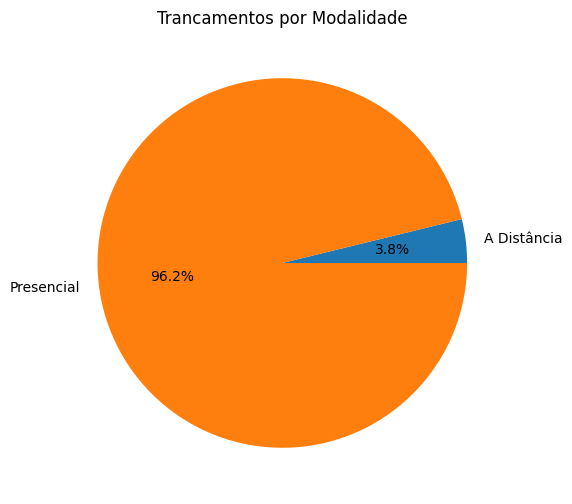

In [142]:
# gráfico pizza (pie) mostrando a quantidade em % da representatividade de trancamentos de cada Campus
modalidade_counts = (
    trancamentos_sanitized_df
    .groupby(['modalidade'])
    .size()
    .sort_index()
)

plt.figure(figsize=(6,6))
plt.pie(
    modalidade_counts.values,
    labels=modalidade_counts.index,
    autopct='%1.1f%%',
)
plt.title('Trancamentos por Modalidade')
plt.show()

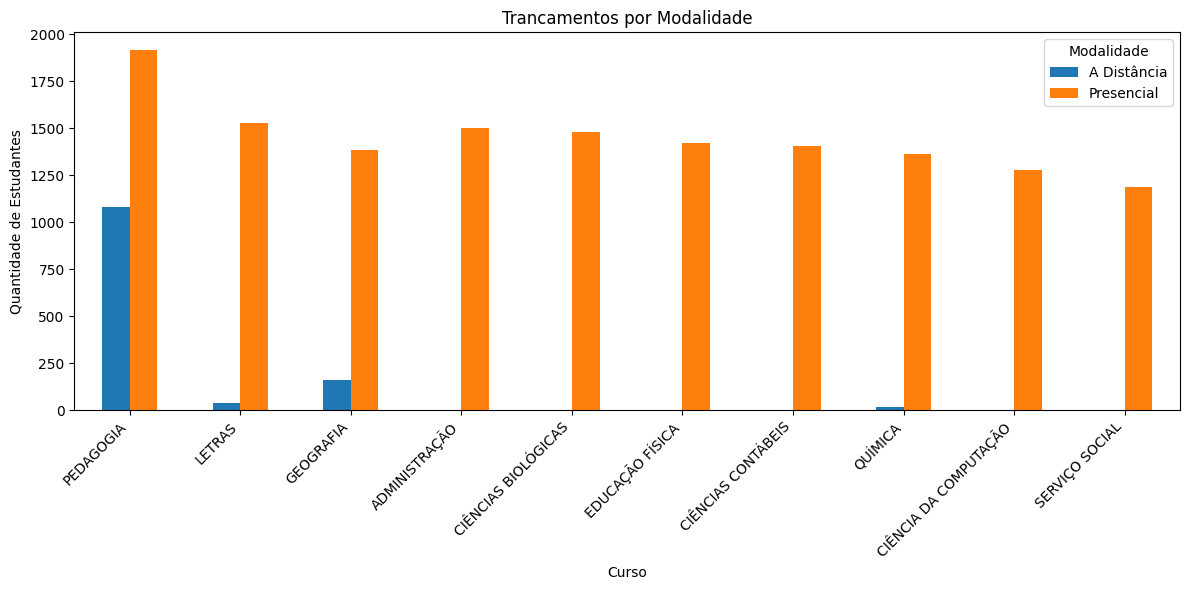

In [143]:
curso_modalidade_counts = trancamentos_sanitized_df.groupby(['curso', 'modalidade']).size().unstack(fill_value=0)

ax = curso_modalidade_counts_top.plot(
    kind='bar',
    stacked=False,
    figsize=(12,6),
)

plt.title(f'Trancamentos por Modalidade')
plt.xlabel('Curso')
plt.ylabel('Quantidade de Estudantes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Modalidade')
plt.tight_layout()
plt.show()

In [ ]:
# Como conclusão, nota-se que os alunos que mais realizam trancamentos pertencem ao grupo do genêro Feminino e idade entre 24 e 44 anos;
# Foi constatado um aumento aproximado de 100% na quantidade de trancamentos na modalidade 'Presencial' no período da pandêmia, enquanto a modalidade 'A Distância' apresentou variação controlada, evidenciando o impacto na pandemia nos trancamentos dos cursos de modalidade 'Presencial';
# Existe um pico de trancamentos não justificados para o curso 'PEDAGOGIA' na modalidade 'A Distância' no período '2016.1', porém os valores em outros períodos é muito inferior para todos cursos na mesma modalidade;
# Esta analise não é conclusória em termos de modalidade, pois não sabemos quais são os cursos oferecidos pela instituição em cada modalidade, logo, não podemos afirmar a relação de peso (weight) entre um trancamento 'Presencial' e um trancamento 'A Distância'.